In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter definition
sr = 0.75
arrival_rates = [0.2, 0.4, 0.5, 0.6, 0.65, 0.7, 0.72, 0.745]


In [3]:
results = []

# simulation loop
for ar in arrival_rates:
    server = [0]

    next_arrival_time = np.random.geometric(ar, 1)[0]
    next_service_time = np.random.geometric(sr, 1)[0]

    for i in range(1, 10**6):
        server.append(server[i-1])

        # arrivals
        if next_arrival_time == 0:
            next_arrival_time = np.random.geometric(ar, 1)[0]
            server[i] += 1
        else:
            next_arrival_time -= 1

        # services
        if server[i] > 0:
            if server[i-1] == 0:
                next_service_time = np.random.geometric(sr, 1)[0]

            if next_service_time == 0:
                next_service_time = np.random.geometric(sr, 1)[0]
                server[i] = max(server[i] - 1, 0)
            else:
                next_service_time -= 1

    
    results.append({'Arrival Rate' : ar, 'Server' : server})



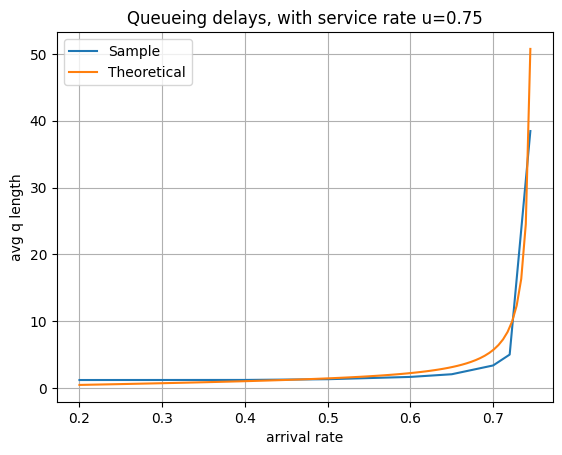

In [4]:
plt.figure()

# sample results
q = [np.mean(x['Server'])/x['Arrival Rate'] for x in results]
plt.plot(arrival_rates, q)

# theoretical results
p = []
t = np.linspace(arrival_rates[0], arrival_rates[-1], 100)
for ar in t: # one liner here would look really messy :p
    alpha = ar / ((1-ar) * sr)
    beta = (ar * (1-sr)) / ((1-ar)*ar)
    E = alpha / ( (1 - beta) * (1 + alpha - beta) )
    p.append(E)

plt.plot(t, p)

plt.legend(['Sample', 'Theoretical'])
plt.title("Queueing delays, with service rate u=0.75")
plt.xlabel("arrival rate")
plt.ylabel("avg q length")
plt.grid(True)
plt.show()

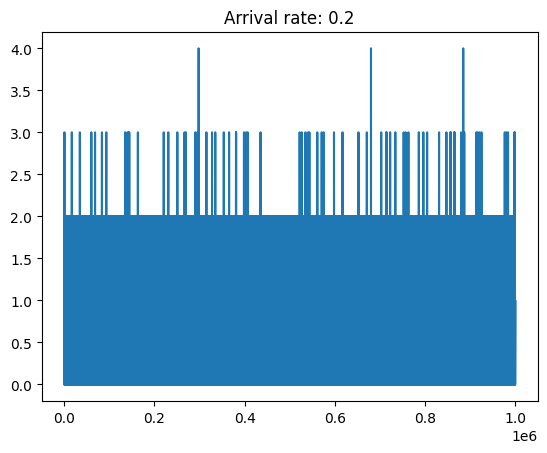

Avg Queue length: 0.24162
Avg queue delay: 1.2081


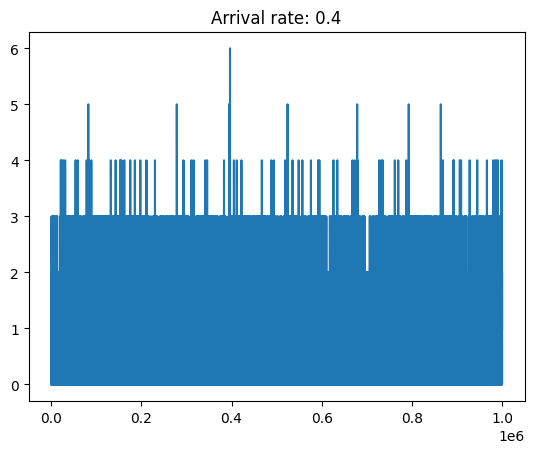

Avg Queue length: 0.487715
Avg queue delay: 1.2192874999999999


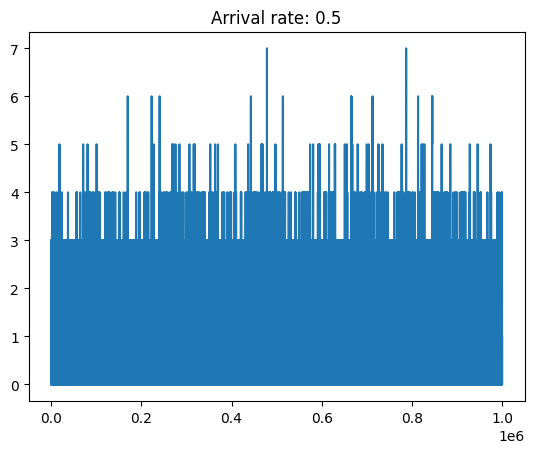

Avg Queue length: 0.664976
Avg queue delay: 1.329952


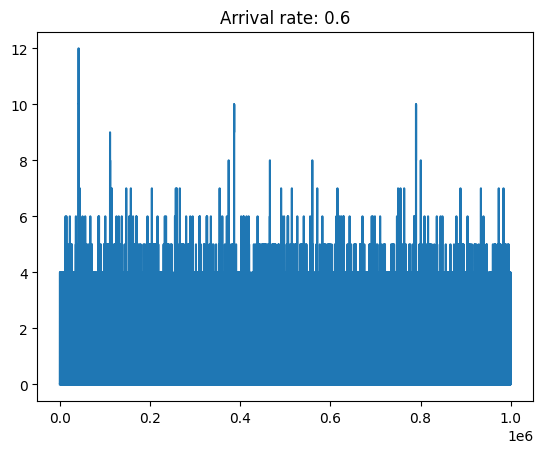

Avg Queue length: 1.003842
Avg queue delay: 1.6730699999999998


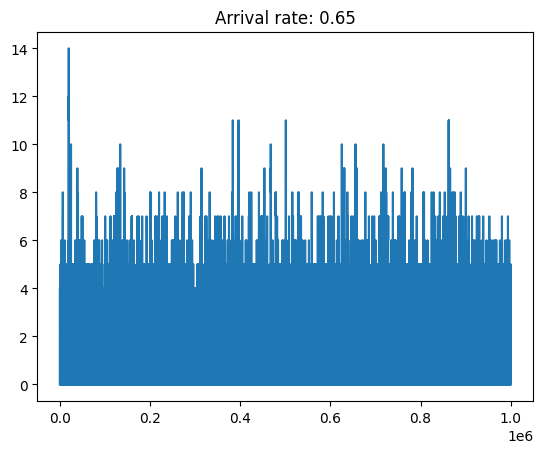

Avg Queue length: 1.347236
Avg queue delay: 2.0726707692307693


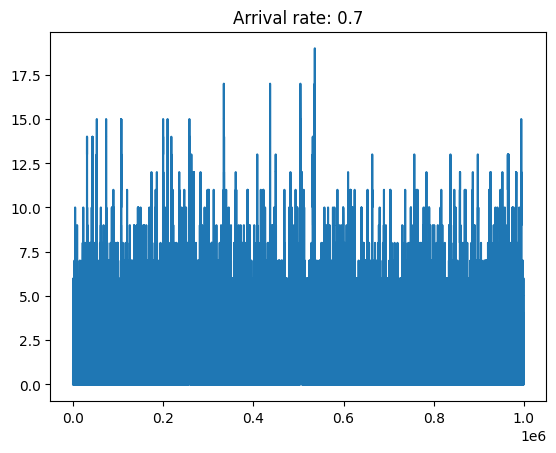

Avg Queue length: 2.371297
Avg queue delay: 3.387567142857143


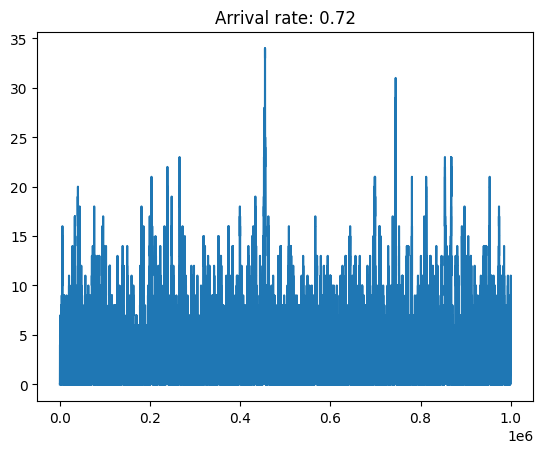

Avg Queue length: 3.61001
Avg queue delay: 5.013902777777778


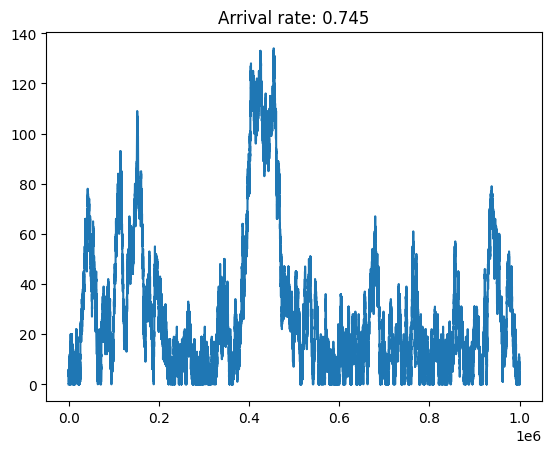

Avg Queue length: 28.650712
Avg queue delay: 38.45733154362416


In [5]:
for result in results:
    plt.figure()
    plt.plot(result['Server'])
    plt.title("Arrival rate: " + str(result['Arrival Rate']))
    plt.show()

    avg_q_len = np.mean(result['Server'])
    print("Avg Queue length:", avg_q_len)
    print("Avg queue delay:", avg_q_len/result['Arrival Rate'])